In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


file_path = '../../data/raw/greenhouse_gas_inventory_data_completed.csv'
df = pd.read_csv(file_path)
df


,country_or_area,continent,year,value,category
0,Australia,Oceania,2014,393126.947000,CO2 Emissions
1,Australia,Oceania,2013,396913.936500,CO2 Emissions
2,Australia,Oceania,2012,406462.847700,CO2 Emissions
3,Australia,Oceania,2011,403705.528300,CO2 Emissions
4,Australia,Oceania,2010,406200.993200,CO2 Emissions
...,...,...,...,...,...
8401,United States of America,North America,1994,593.222570,Mixed HFCs and PFCs Emissions
8402,United States of America,North America,1993,586.939752,Mixed HFCs and PFCs Emissions
8403,United States of America,North America,1992,574.414624,Mixed HFCs and PFCs Emissions
8404,United States of America,North America,1991,566.900968,Mixed HFCs and PFCs Emissions


In [8]:
uk = df[(df['country_or_area'] == "United Kingdom") & (df['category'] == "CO2 Emissions")].copy()
uk['year'] = pd.to_datetime(uk['year'], format="%Y")
uk = uk.sort_values(by='year')
uk = uk.set_index('year',drop=True)
uk

,country_or_area,continent,value,category
year,,,,
1990-01-01,United Kingdom,Europe,596398.4732,CO2 Emissions
1991-01-01,United Kingdom,Europe,604652.8969,CO2 Emissions
1992-01-01,United Kingdom,Europe,589306.0181,CO2 Emissions
1993-01-01,United Kingdom,Europe,574764.7527,CO2 Emissions
1994-01-01,United Kingdom,Europe,569458.3649,CO2 Emissions
1995-01-01,United Kingdom,Europe,561202.9540,CO2 Emissions
1996-01-01,United Kingdom,Europe,582752.7844,CO2 Emissions
1997-01-01,United Kingdom,Europe,557608.7794,CO2 Emissions
1998-01-01,United Kingdom,Europe,561253.7228,CO2 Emissions


In [10]:
uk_sort = uk[['value']]
uk_sort

,value
year,
1990-01-01,596398.4732
1991-01-01,604652.8969
1992-01-01,589306.0181
1993-01-01,574764.7527
1994-01-01,569458.3649
1995-01-01,561202.9540
1996-01-01,582752.7844
1997-01-01,557608.7794
1998-01-01,561253.7228


In [17]:
# Calculate Simple Moving Averages (SMA) with different window sizes
uk_sort['SMA_5'] = uk_sort['value'].rolling(window=5).mean()

uk_sort['EMA_5'] = uk_sort['value'].ewm(span=5, adjust=False).mean()

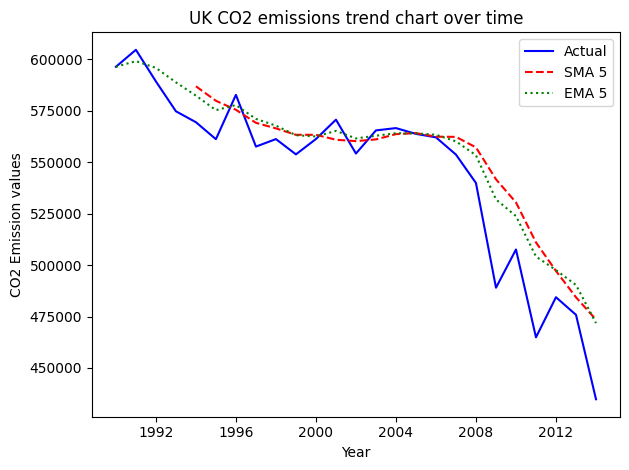

In [18]:
# Vẽ các đường SMA và EMA với màu sắc và kiểu dáng khác nhau
plt.plot(uk_sort['value'], label='Actual', color='blue')

plt.plot(uk_sort['SMA_5'], label='SMA 5', color='red', linestyle='--')

plt.plot(uk_sort['EMA_5'], label='EMA 5', color='green', linestyle=':')

# Thêm tiêu đề và nhãn trục
plt.title('UK CO2 emissions trend chart over time')
plt.xlabel('Year')
plt.ylabel('CO2 Emission values')

# Thêm chú thích
plt.legend()

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()